# Tensorflow MNIST data call and study several issues at the bottom

## Call tensorflow mnist data
### references
1. MNIST 초급: https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## call the image
### reference
1. 이미지 처리 기초: https://datascienceschool.net/view-notebook/9af8d8e93c084bc49f0ac2bb8a20e2a4/
2. https://cinema4dr12.tistory.com/1258

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
print(type(mnist))
print(type(mnist.train))
print(mnist.train)
# type(mnist.train.shape)
print ('====')
print(type(mnist.train.images)) # ndarray
# print(mnist.train.images[0])
print(mnist.train.images.dtype) # float32
print(mnist.train.images.ndim) # 2D
print(mnist.train.images.size) # 43120000
print ('====')
print(type(mnist.train.labels)) # ndarray
# print(mnist.train.labels[0])
print(mnist.train.labels.dtype) # float64
print(mnist.train.labels.ndim) # 2D
print(mnist.train.labels.size) # 550000
print ('====')


<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
====
<class 'numpy.ndarray'>
float32
2
43120000
====
<class 'numpy.ndarray'>
float64
2
550000
====


(55000, 784)


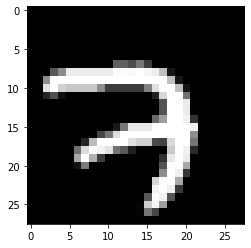

In [63]:
print(mnist.train.images.shape) # 55000 images and 1 image with 784 pixels. (28*28 image)
[n_image,n_pix] = mnist.train.images.shape
# each pixel values range is [0,1]

temp = np.zeros((28,28),dtype='float32')

for i in range(n_pix):
    [row_n,col_n] = divmod(i,28) # quotient -> row, remainder -> col
    temp[row_n, col_n] = mnist.train.images[0,i]

plt.imshow(temp, cmap='gray')

In [61]:
print(mnist.train.labels.shape)
[n_image,n_pix] = mnist.train.labels.shape

print(type(mnist.train.labels[0]))
print(mnist.train.labels[0])
print(np.where(mnist.train.labels[0] == 1))
print(type(np.where(mnist.train.labels[0] == 1)))
print(np.where(mnist.train.labels[0] == 1)[0][0]) # index of the number => it means, it seems like number 7

(55000, 10)
<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(array([7], dtype=int64),)
<class 'tuple'>
7


## Softmax regression from tutorial
* it will make result in float type. for that reason, use float type for label array.
1. calculate evidence that data include in each class.
2. change calculated result in probability

* details
1. sum(intensity (darkness) * weight) => - or +
2. + bias on above result.
$$ => evidence_i = \sum_{j} {W_(i,j)x_j} + b_i$$

$$ y = softmax(evidence) $$

$$ softmax(x) = normalize(exp(x)) $$
$$ softmax(x)_i = {exp(x_i)\over \sum_{j} {exp(x_j)} } $$

$$ y=softmax(Wx + b)$$



In [67]:
import tensorflow as tf

# placeholder: assign input data
x = tf.placeholder(tf.float32, [None, 784])
print(type(x))

# variable: used in calulation and updated by calculation (model variables)
W = tf.Variable(tf.zeros([784, 10])) # Weight
b = tf.Variable(tf.zeros([10])) # bias 

<class 'tensorflow.python.framework.ops.Tensor'>


In [68]:
# as it is matrix calculation, input order and dimension is important
y = tf.nn.softmax(tf.matmul(x,W) + b)

## Measure
### Cross entrophy
$$ H_{y^{'}}(y) = - \sum_{i} {y_i^{'} log(y_i)}$$




In [ ]:
y_ = tf.placefolder(tf.float32, [None, 10])

cross_entrophy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# tf.log : log value of each element 
# tf.reduce_sum : sum the value at indices  (here, sum the value at [1] (second element))
# tf.reduce_mean : get the mean of all example of batch
